### import

In [1]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 
              'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 
              'sqft_lot':int, 'view':int}

In [2]:
import pandas as pd
import numpy as np

In [3]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 2402-C1E6

 Directory of C:\Users\fehiepsi\Dropbox\D1O2\notebooks\mooc

29-Feb-16  02:31 PM    <DIR>          .
29-Feb-16  02:31 PM    <DIR>          ..
29-Feb-16  02:31 PM    <DIR>          .ipynb_checkpoints
17-Jan-16  08:03 PM        89,444,990 amazon_baby.csv
14-Jan-16  05:17 PM         2,598,020 home_data.csv
20-Feb-16  09:59 AM         2,515,206 kc_house_data.csv
20-Feb-16  09:59 AM           492,571 kc_house_test_data.csv
20-Feb-16  09:59 AM         2,022,817 kc_house_train_data.csv
15-Jan-16  02:31 AM            61,673 mooc.ipynb
20-Feb-16  11:38 AM            13,261 numpy-tutorial.ipynb
15-Jan-16  12:33 AM            12,037 Predicting house prices.ipynb
15-Jan-16  08:40 PM             6,776 regression-week-1.ipynb
21-Feb-16  12:52 PM            29,523 regression-week-2.ipynb
29-Feb-16  02:31 PM            29,523 regression-week-3.ipynb
15-Jan-16  01:53 AM           508,740 test-data.csv
15-Jan-16  01:53 AM         2,089

In [8]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature ** power
    return poly_dataframe

In [6]:
sales = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
sales = sales.sort_values(by=['sqft_living', 'price'])

C:\Users\fehiepsi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [21]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 4)

In [22]:
poly1_data['price'] = sales['price']

In [11]:
from sklearn import linear_model

In [23]:
model1 = linear_model.LinearRegression()
model1.fit(poly1_data['power_1'].reshape(-1, 1), poly1_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

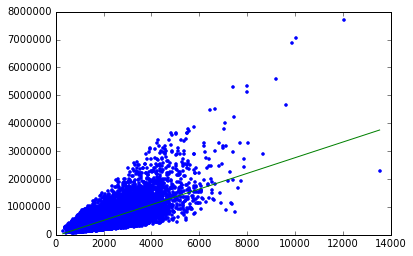

In [24]:
plt.plot(poly1_data['power_1'], poly1_data['price'], '.', poly1_data['power_1'],
         model1.predict(poly1_data['power_1'].reshape(-1, 1)), '-')

In [38]:
def draw_with_degree(i):
    poly_i_data = polynomial_dataframe(sales['sqft_living'], i)
    model_i = linear_model.LinearRegression()
    model_i.fit(poly_i_data, sales['price'])
    plt.plot(poly_i_data['power_1'], sales['price'], '.', poly_i_data['power_1'],
             model_i.predict(poly_i_data), '-')
    print(model_i.coef_)

[  4.56404164e-91  -2.69272559e-50   1.04675234e-55   3.19248141e-61
   1.25418450e-74   2.68575522e-71   2.26147568e-67   1.85900299e-63
   1.47144116e-59   1.09771012e-55   7.43509038e-52   4.23015578e-48
   1.61618577e-44  -2.49283826e-48   9.59718336e-53]


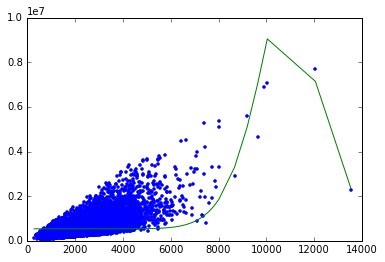

In [39]:
draw_with_degree(15)

### Solve the quiz

2.18641116556e-52
-1.96475565707e-49
3.43132932057e-51
-6.09068013691e-49


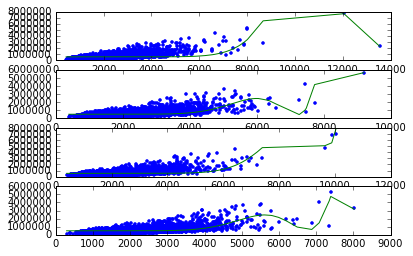

In [49]:
sales_list = [0]*4
poly15_data = [0]*4
model = linear_model.LinearRegression()
for i in range(4):
    sales_list[i] = pd.read_csv('wk3_kc_house_set_'+str(i+1)+'_data.csv', dtype=dtype_dict)
    sales_list[i].sort_values(by=['sqft_living', 'price'])
    poly15_data[i] = polynomial_dataframe(sales_list[i]['sqft_living'], 15)
    model.fit(poly15_data[i], sales_list[i]['price'])
    plt.subplot(4, 1, i+1)
    plt.plot(poly15_data[i]['power_1'], sales_list[i]['price'], '.', poly15_data[i]['power_1'],
             model.predict(poly15_data[i]), '-')
    print(model.coef_[14])

In [52]:
sales = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
sales = sales.sort_values(by=['sqft_living', 'price'])
rss = [0]*15
for degree in range(1,16):
    poly_data = polynomial_dataframe(sales['sqft_living'], degree)
    model.fit(poly_data, sales['price'])
    rss[degree-1] = ((model.predict(poly_data) - sales['price'])**2).sum()

In [54]:
print(rss.index(min(rss)) + 1)

6


In [55]:
sales_test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)
sales_test = sales_test.sort_values(by=['sqft_living', 'price'])
poly_data = polynomial_dataframe(sales_test['sqft_living'], 6)
model.fit(poly_data, sales_test['price'])
rss = ((model.predict(poly_data) - sales_test['price'])**2).sum()
print(rss)

129838943835384.81


### Previous

In [3]:
train_data = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict)

In [4]:
test_data = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict)

In [13]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [30]:
train_data['bedrooms_squared'] = train_data['bedrooms'] ** 2
train_data['bed_bath_rooms'] = train_data['bedrooms'] * train_data['bathrooms']
train_data['log_sqft_living'] = np.log(train_data['sqft_living'])
train_data['lat_plus_long'] = train_data['lat'] + train_data['long']

In [21]:
test_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_squared,bed_bath_rooms,log_sqft_living,lat_plus_long
0,0114101516,20140528T000000,310000,3,1.0,1430,19901,1.5,0,0,...,0,98028,47.7558,-122.229,1780,12697,9,3.0,7.265430,-74.4732
1,9297300055,20150124T000000,650000,4,3.0,2950,5000,2,0,3,...,0,98126,47.5714,-122.375,2140,4000,16,12.0,7.989560,-74.8036
2,1202000200,20141103T000000,233000,3,2.0,1710,4697,1.5,0,0,...,0,98002,47.3048,-122.218,1030,4705,9,6.0,7.444249,-74.9132
3,8562750320,20141110T000000,580500,3,2.5,2320,3980,2,0,0,...,0,98027,47.5391,-122.070,2580,3980,9,7.5,7.749322,-74.5309
4,7589200193,20141110T000000,535000,3,1.0,1090,3000,1.5,0,0,...,0,98117,47.6889,-122.375,1570,5080,9,3.0,6.993933,-74.6861


In [19]:
test_data['bedrooms_squared'] = test_data['bedrooms'] ** 2
test_data['bed_bath_rooms'] = test_data['bedrooms'] * test_data['bathrooms']
test_data['log_sqft_living'] = np.log(test_data['sqft_living'])
test_data['lat_plus_long'] = test_data['lat'] + test_data['long']

In [20]:
print(test_data['bedrooms_squared'].mean(), test_data['bed_bath_rooms'].mean(), test_data['log_sqft_living'].mean(),
     test_data['lat_plus_long'].mean())

12.4466777015843 7.5039016315913925 7.550274679645921 -74.65333355403185


In [23]:
from sklearn import linear_model

In [25]:
first_model = linear_model.LinearRegression()
second_model = linear_model.LinearRegression()
third_model = linear_model.LinearRegression()

In [26]:
first_features = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
second_features = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms']
third_features = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms', 
                  'bedrooms_squared', 'log_sqft_living', 'lat_plus_long']

In [28]:
first_model.fit(train_data[first_features], train_data.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
second_model.fit(train_data[second_features], train_data.price)
third_model.fit(train_data[third_features], train_data.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print(first_model.coef_[2], second_model.coef_[2])

15706.7420827 -71461.3082928


In [37]:
rss1_train = sum((first_model.predict(train_data[first_features]) - train_data.price)**2)
rss2_train = sum((second_model.predict(train_data[second_features]) - train_data.price)**2)
rss3_train = sum((third_model.predict(train_data[third_features]) - train_data.price)**2)
rss1_test = sum((first_model.predict(test_data[first_features]) - test_data.price)**2)
rss2_test = sum((second_model.predict(test_data[second_features]) - test_data.price)**2)
rss3_test = sum((third_model.predict(test_data[third_features]) - test_data.price)**2)

In [38]:
print(rss1_train, rss2_train, rss3_train, rss1_test, rss2_test, rss3_test)

9.6787996305e+14 9.58419635074e+14 9.0343645505e+14 2.25500469795e+14 2.23377462976e+14 2.59236319207e+14


In [16]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # add a constant column to an SFrame
    # prepend variable 'constant' to the features list
    features = ['constant'] + features
    
    # select the columns of data_SFrame given by the ‘features’ list into the SFrame ‘features_sframe’
    # this will convert the features_sframe into a numpy matrix with GraphLab Create >= 1.7!!
    # features_matrix = features_sframe.to_numpy()
    features_matrix = data_sframe[features].as_matrix()
    
    # assign the column of data_sframe associated with the target to the variable ‘output_sarray’
    # this will convert the SArray into a numpy array:
    # output_array = output_sarray.to_numpy() # GraphLab Create>= 1.7!!
    output_array = data_sframe[output].as_matrix()
    return (features_matrix, output_array)

In [6]:
def predict_outcome(feature_matrix, weights):
    return np.dot(feature_matrix, weights)

In [9]:
def feature_derivative(errors, feature):
    return 2 * np.dot(errors, feature)

In [10]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False
    weights = np.array(initial_weights)
    while not converged:
        # compute the predictions based on feature_matrix and weights:
        predictions = predict_outcome(feature_matrix, weights)
        # compute the errors as predictions - output:
        errors = predictions - output
        
        gradient_sum_squares = 0 # initialize the gradient
        # while not converged, update each weight individually:
        for i in range(len(weights)):
            # Recall that feature_matrix[:, i] is the feature column associated with weights[i]
            # compute the derivative for weight[i]:
            derivative_i = feature_derivative(errors, feature_matrix[:, i])
            
            # add the squared derivative to the gradient magnitude
            gradient_sum_squares += derivative_i ** 2
            
            # update the weight based on step size and derivative:
            weights[i] -= step_size * derivative_i
            
        gradient_magnitude = np.sqrt(gradient_sum_squares)
        if gradient_magnitude < tolerance:
            converged = True
    return weights

In [17]:
simple_features = ['sqft_living']
my_output= 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
initial_weights = np.array([-47000., 1.])
step_size = 7 * 10**(-12)
tolerance = 2.5 * 10**7

In [18]:
simple_weights = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)

In [19]:
print(simple_weights[1])

281.912119175


In [20]:
(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [21]:
predicted_price = np.dot(test_simple_feature_matrix, simple_weights)

In [22]:
print(predicted_price[0])

356134.443255


In [23]:
# compute rss
rss = np.sum((predicted_price - test_output)**2)

In [24]:
model_features = ['sqft_living', 'sqft_living15']
my_output= 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features,my_output)
initial_weights = np.array([-100000., 1., 1.])
step_size = 4 * 10**(-12)
tolerance = 1 * 10**9

In [26]:
regression_weights = regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance)

In [27]:
(test_model_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)
predicted_price_2 = np.dot(test_model_feature_matrix, regression_weights)
print(predicted_price_2[0])

366651.411629


In [29]:
test_output[0]

310000.0

In [30]:
rss2 = np.sum((predicted_price_2 - test_output)**2)
print(rss, rss2)

2.75400044902e+14 2.7026344363e+14
